## World Happiness Report
#### DATASET: https://www.kaggle.com/datasets/mathurinache/world-happiness-report

### 1. 라이브러리 선언

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install lightgbm
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

### 2. EDA & 전처리

In [2]:
smile_2015=pd.read_csv('2015.csv')
smile_2016=pd.read_csv('2016.csv')
smile_2017=pd.read_csv('2017.csv')
smile_2018=pd.read_csv('2018.csv')
smile_2019=pd.read_csv('2019.csv')
smile_2020=pd.read_csv('2020.csv')
smile_2021=pd.read_csv('2021.csv')
smile_2022=pd.read_csv('2022.csv',thousands = ',')

In [3]:
smile_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
smile_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
smile_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
smile_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
smile_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
smile_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by Log GDP per capita,Explained by Social support,Explained by Healthy life expectancy,Explained by Freedom to make life choices,Explained by Generosity,Explained by Perceptions of corruption,Dystopia . residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [9]:
smile_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by Log GDP per capita,Explained by Social support,Explained by Healthy life expectancy,Explained by Freedom to make life choices,Explained by Generosity,Explained by Perceptions of corruption,Dystopia . residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [10]:
smile_2022.head()

,RANK,Country,Happiness score,Whisker high,Whisker low,Dystopia. residual,Explained by GDP per capita,Explained by Social support,Explained by Healthy life expectancy,Explained by Freedom to make life choices,Explained by Generosity,Explained by Perceptions of corruption
0,1,Finland,7821.0,7886.0,7756.0,2518.0,1892.0,1258.0,775.0,736.0,109.0,534.0
1,2,Denmark,7636.0,7710.0,7563.0,2226.0,1953.0,1243.0,777.0,719.0,188.0,532.0
2,3,Iceland,7557.0,7651.0,7464.0,2320.0,1936.0,1320.0,803.0,718.0,270.0,191.0
3,4,Switzerland,7512.0,7586.0,7437.0,2153.0,2026.0,1226.0,822.0,677.0,147.0,461.0
4,5,Netherlands,7415.0,7471.0,7359.0,2137.0,1945.0,1206.0,787.0,651.0,271.0,419.0


### 2-1. 칼럼명과 세부 데이터 수정

In [11]:
smile_2022.iloc[:,2:11]=smile_2022.iloc[:,2:11].div(1000)
smile_2022.head()

,RANK,Country,Happiness score,Whisker high,Whisker low,Dystopia. residual,Explained by GDP per capita,Explained by Social support,Explained by Healthy life expectancy,Explained by Freedom to make life choices,Explained by Generosity,Explained by Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,534.0
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,532.0
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,191.0
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,461.0
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,419.0


In [12]:
smile_2022.isnull().sum()

RANK                                         0
Country                                      0
Happiness score                              1
Whisker high                                 1
Whisker low                                  1
Dystopia.  residual                          1
Explained by GDP per capita                  1
Explained by Social support                  1
Explained by Healthy life expectancy         1
Explained by Freedom to make life choices    1
Explained by Generosity                      1
Explained by Perceptions of corruption       1
dtype: int64

In [13]:
smile_2022=smile_2022.dropna()
smile_2022.isnull().sum()

RANK                                         0
Country                                      0
Happiness score                              0
Whisker high                                 0
Whisker low                                  0
Dystopia.  residual                          0
Explained by GDP per capita                  0
Explained by Social support                  0
Explained by Healthy life expectancy         0
Explained by Freedom to make life choices    0
Explained by Generosity                      0
Explained by Perceptions of corruption       0
dtype: int64

In [14]:
#s_2015=s_2015.drop(columns={})
#s_2016=s_2016.drop(columns={})
smile_2017=smile_2017.rename(columns={'Happiness.Score':'Happiness Score'})
smile_2018=smile_2018.rename(columns={'Score':'Happiness Score'})
smile_2019=smile_2019.rename(columns={'Score':'Happiness Score'})
smile_2020=smile_2020.rename(columns={'Ladder score':'Happiness Score'})
smile_2021=smile_2021.rename(columns={'Ladder score':'Happiness Score'})
smile_2022=smile_2022.rename(columns={'Happiness score':'Happiness Score'})

In [15]:
smile_2015=smile_2015.select_dtypes(exclude='object')
smile_2016=smile_2016.select_dtypes(exclude='object')
smile_2017=smile_2017.select_dtypes(exclude='object')
smile_2018=smile_2018.select_dtypes(exclude='object')
smile_2019=smile_2019.select_dtypes(exclude='object')
smile_2020=smile_2020.select_dtypes(exclude='object')
smile_2021=smile_2021.select_dtypes(exclude='object')
smile_2022=smile_2022.select_dtypes(exclude='object')

In [16]:
# lineplot에서 분산을 보기 위해 score값 반올림
s_2015=smile_2015.round({'Happiness Score':0})
s_2016=smile_2016.round({'Happiness Score':0})
s_2017=smile_2017.round({'Happiness Score':0})
s_2018=smile_2018.round({'Happiness Score':0})
s_2019=smile_2019.round({'Happiness Score':0})
s_2020=smile_2020.round({'Happiness Score':0})
s_2021=smile_2021.round({'Happiness Score':0})
s_2022=smile_2022.round({'Happiness Score':0})

### 2-2. 그래프를 통해서 데이터 분석

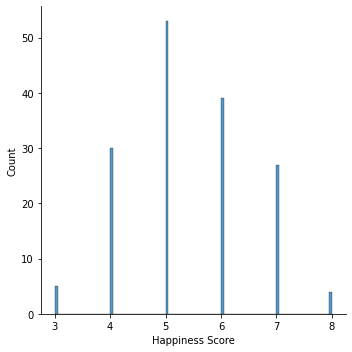

In [17]:
data=s_2015['Happiness Score']
sns.displot(data,bins=100)

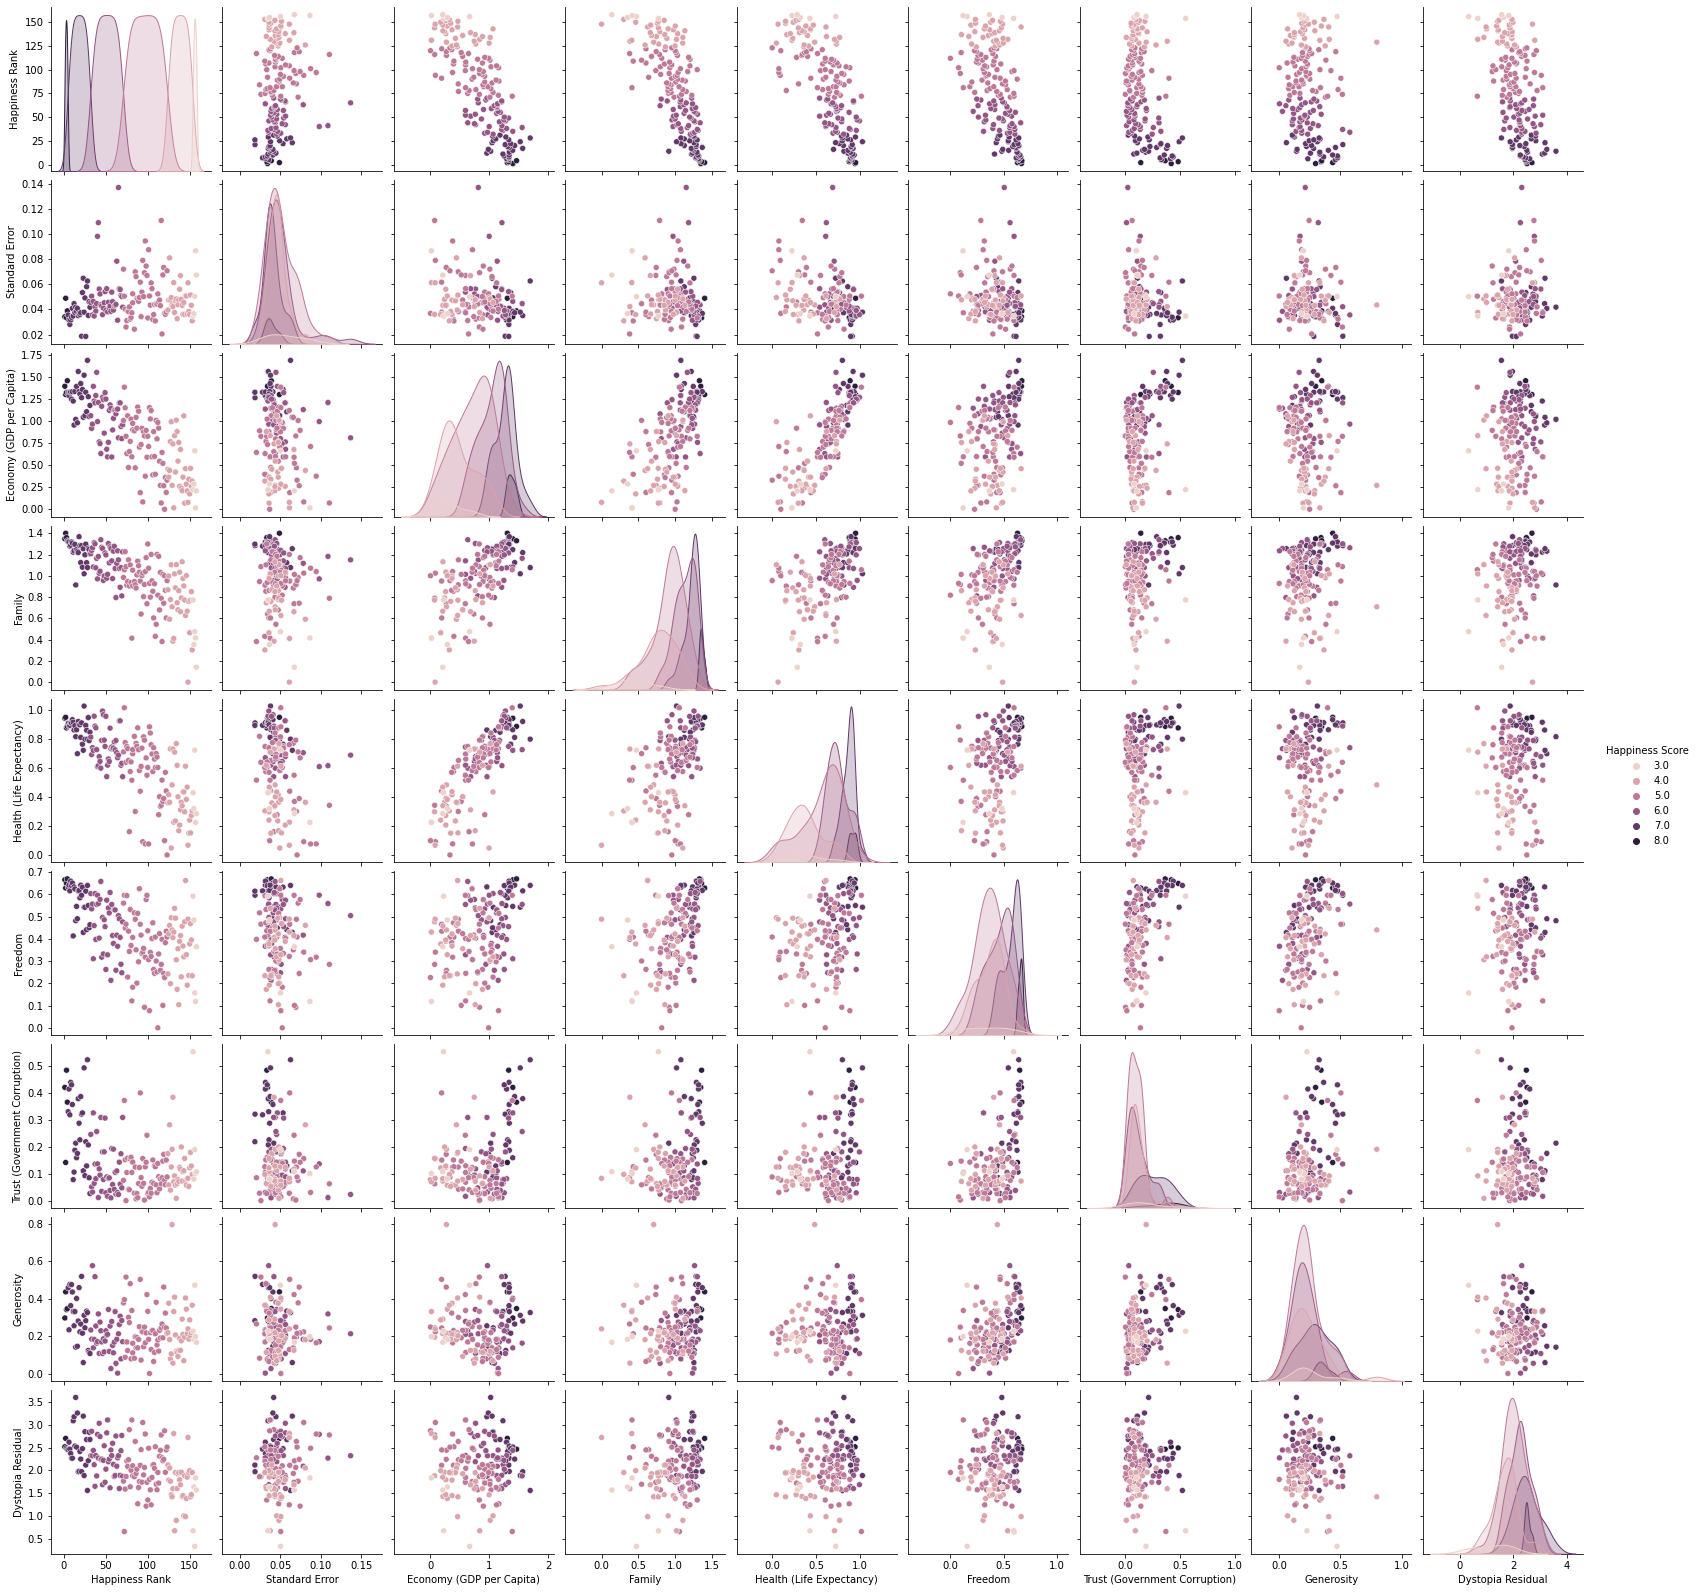

In [18]:
sns.pairplot(s_2015,hue='Happiness Score')

In [19]:
x=[]
data=s_2015 # data만 수정
for i in data.columns:
    if i=='Happiness Score':
        continue
    x.append(i)

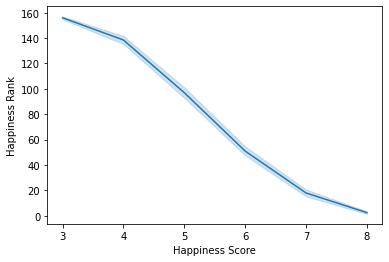

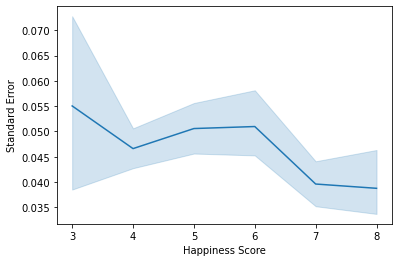

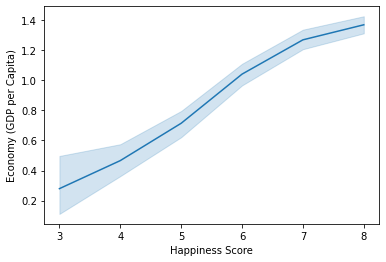

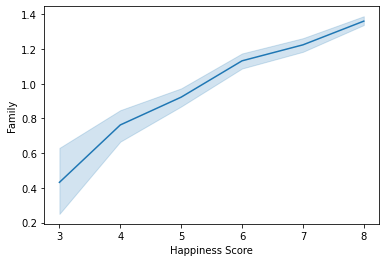

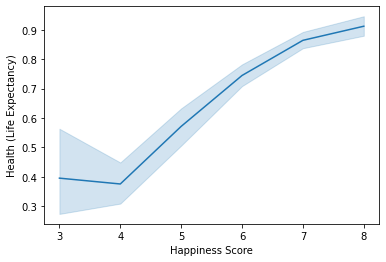

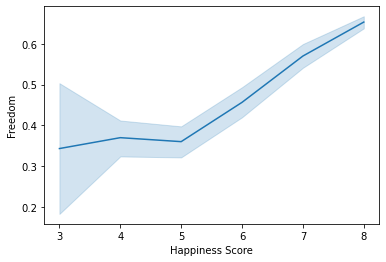

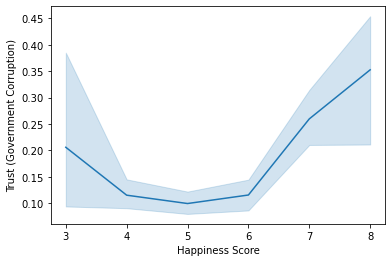

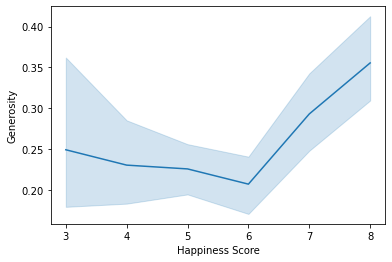

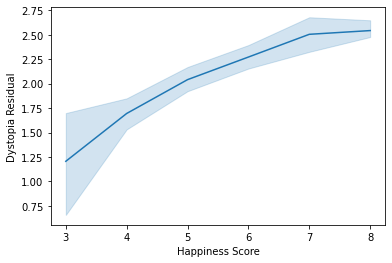

In [20]:
for i in range(len(x)):
    sns.lineplot(x="Happiness Score",y=x[i],data=data)
    plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


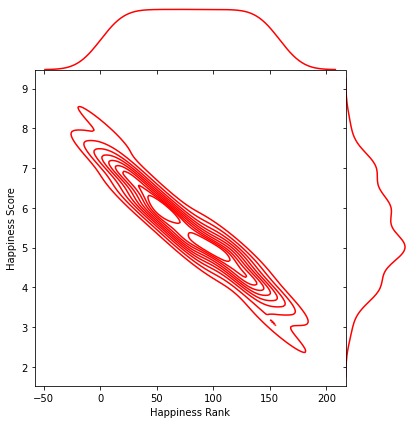

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


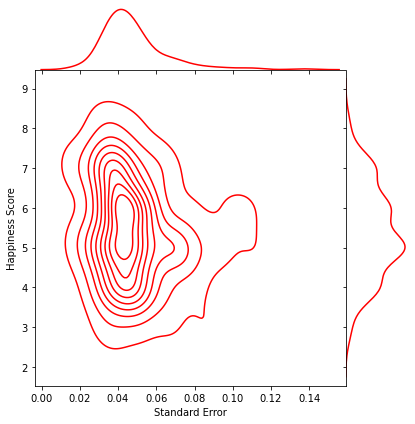

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


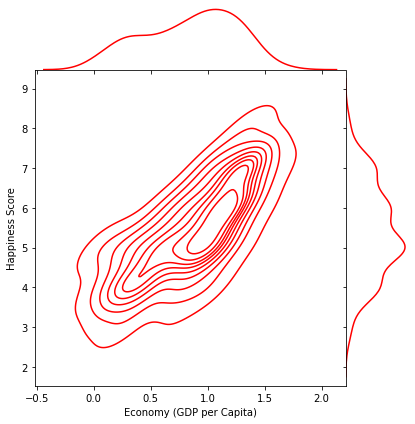

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


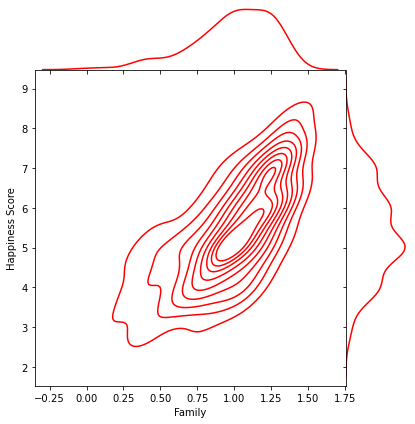

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


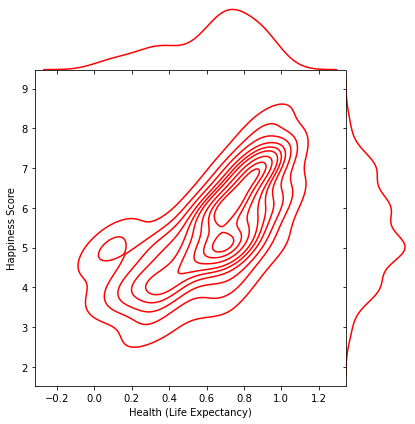

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


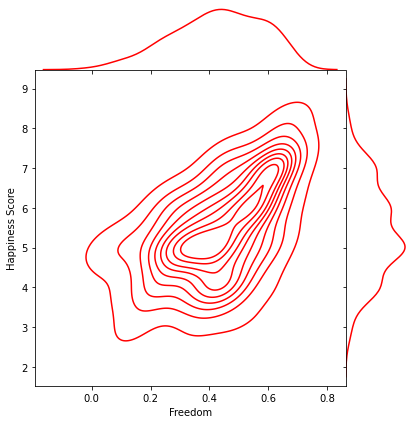

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


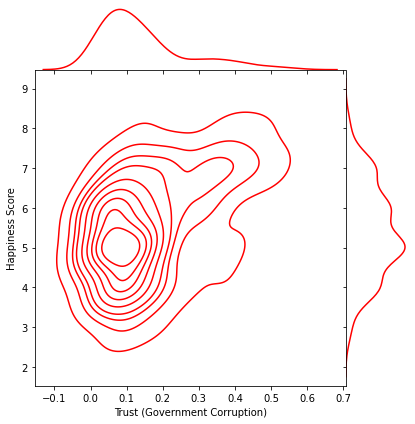

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


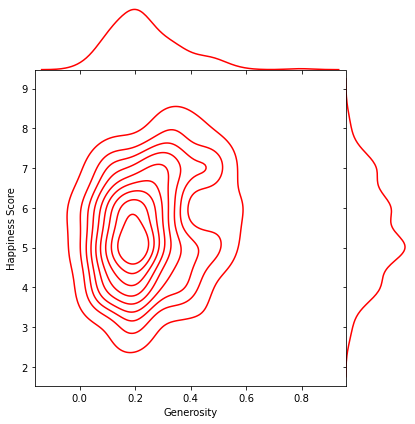

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


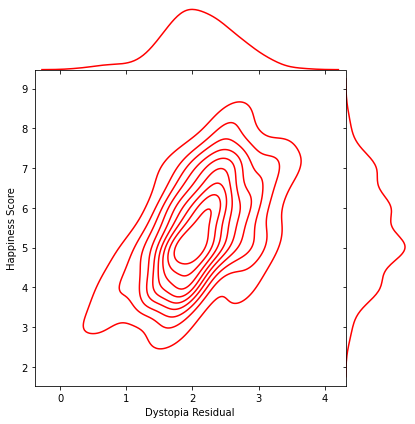

In [21]:
for i in range(len(x)):
    sns.jointplot(x[i],"Happiness Score",data=data,kind="kde",space=0,color='r')
    plt.show()

### 2-3. 변수간 상관도 확인

<AxesSubplot:>

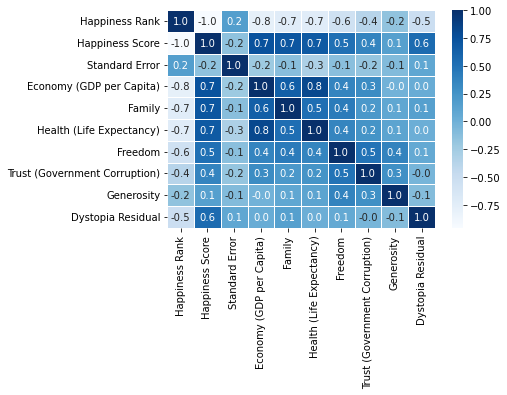

In [22]:
sns.heatmap(data=data.corr(),annot=True,fmt='.1f',linewidths=.5,cmap='Blues')


### 2-4. 상관도 낮은 칼럼 제거

In [23]:
smile_2015=smile_2015.drop(columns={'Standard Error','Trust (Government Corruption)','Generosity'})
smile_2016=smile_2016.drop(columns={'Generosity','Trust (Government Corruption)'})
smile_2017=smile_2017.drop(columns={'Generosity','Trust..Government.Corruption.'})
smile_2018=smile_2018.drop(columns={'Generosity','Perceptions of corruption'})
smile_2019=smile_2019.drop(columns={'Generosity','Perceptions of corruption'})
smile_2020=smile_2020.drop(columns={'Standard error of ladder score','Generosity','Perceptions of corruption','Ladder score in Dystopia','Explained by Generosity','Explained by Perceptions of corruption'})
smile_2021=smile_2021.drop(columns={'Standard error of ladder score','Generosity','Perceptions of corruption','Ladder score in Dystopia','Explained by Generosity','Explained by Perceptions of corruption'})
smile_2022=smile_2022.drop(columns={'Dystopia.  residual','Explained by Generosity','Explained by Perceptions of corruption'})

### 3. LGBMRegressor의 하이퍼파라미터를 BayesianOptimization으로 결정
### 3-1. test 데이터셋 분리

In [24]:
X,test=train_test_split(smile_2022,test_size=0.2,random_state=0)
X_2=X.drop('Happiness Score',axis=1)
y=X['Happiness Score']

In [25]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

### 3-2. BayesianOptimization으로 점수 측정

In [26]:
lgbm_parameter_bounds = {
    'learning_rate':(0.001,0.01),
    'n_estimators' : (10,1000),
    'max_depth' : (1,10),
    'subsample' : (0.1,1),
    'colsample_bytree' : (0.5,1),
    'num_leaves': (24, 45),
    }

In [27]:
def lgbm_bo(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves):
    lgbm_params = {
        'learning_rate' : float(learning_rate),
        'n_estimators' : int(n_estimators),
        'max_depth' : int(max_depth),
        'subsample' : float(subsample),
        'colsample_bytree' : float(colsample_bytree),
        'num_leaves' : int(num_leaves),
    }
    lgbm = LGBMRegressor(**lgbm_params)
    X_train, X_valid, y_train, y_valid = train_test_split(X_2, y, test_size = 0.2)
    lgbm.fit(X_train, y_train)
    mse_score = cross_val_score(lgbm, X_valid, y_valid, scoring = 'neg_mean_squared_error', cv = 5)
    score = np.mean(mse_score)
    return score

In [ ]:
BO_lgbm = BayesianOptimization(f = lgbm_bo, pbounds = lgbm_parameter_bounds, random_state = 0)

#학습 시작
BO_lgbm.maximize(init_points = 10, n_iter = 1000)

max_params = BO_lgbm.max['params']
max_params['learning_rate'] = float(max_params['learning_rate'])
max_params['n_estimators'] = int(max_params['n_estimators'])
max_params['max_depth'] = int(max_params['max_depth'])
max_params['subsample'] = float(max_params['subsample'])
max_params['colsample_bytree'] = float(max_params['colsample_bytree'])
max_params['num_leaves'] = int(max_params['num_leaves'])
print(max_params)

### 3-3. 점수가 제일 높은 하이퍼 파라미터로 LGBMRegressor 적용

In [56]:
lgbm_tune=LGBMRegressor(learning_rate = 0.0037337563427973144, max_depth = 8, n_estimators = 882, num_leaves = 28, subsample = 0.8785145164883955, colsample_bytree = 0.7861629918439279)
lgbm_tune.fit(X_2,y)

LGBMRegressor(colsample_bytree=0.7861629918439279,
              learning_rate=0.0037337563427973144, max_depth=8,
              n_estimators=882, num_leaves=28, subsample=0.8785145164883955)

In [57]:
X_test=test.drop('Happiness Score',axis=1)
y_test=test['Happiness Score']
pred = lgbm_tune.predict(X_test)

### 4. 최종 점수
### 4-1. 2015년

In [58]:
r2_score(y_test,pred)

0.9885494913968872

### 4-2. 2016년

In [59]:
X,test=train_test_split(smile_2016,test_size=0.2,random_state=0)
X_2=X.drop('Happiness Score',axis=1)
y=X['Happiness Score']

In [66]:
lgbm_tune=LGBMRegressor(learning_rate = 0.0037337563427973144, max_depth = 8, n_estimators = 882, num_leaves = 28, subsample = 0.8785145164883955, colsample_bytree = 0.7861629918439279)
lgbm_tune.fit(X_2,y)

LGBMRegressor(colsample_bytree=0.7861629918439279,
              learning_rate=0.0037337563427973144, max_depth=8,
              n_estimators=882, num_leaves=28, subsample=0.8785145164883955)

In [67]:
X_test=test.drop('Happiness Score',axis=1)
y_test=test['Happiness Score']
pred = lgbm_tune.predict(X_test)

In [68]:
r2_score(y_test,pred)

0.9632013375807892

### 4-3. 2017년

In [69]:
X,test=train_test_split(smile_2017,test_size=0.2,random_state=0)
X_2=X.drop('Happiness Score',axis=1)
y=X['Happiness Score']

lgbm_tune=LGBMRegressor(learning_rate = 0.0037337563427973144, max_depth = 8, n_estimators = 882, num_leaves = 28, subsample = 0.8785145164883955, colsample_bytree = 0.7861629918439279)
lgbm_tune.fit(X_2,y)

X_test=test.drop('Happiness Score',axis=1)
y_test=test['Happiness Score']
pred = lgbm_tune.predict(X_test)

r2_score(y_test,pred)

0.9634676120227131

### 4-4. 2018년

In [70]:
X,test=train_test_split(smile_2018,test_size=0.2,random_state=0)
X_2=X.drop('Happiness Score',axis=1)
y=X['Happiness Score']

lgbm_tune=LGBMRegressor(learning_rate = 0.0037337563427973144, max_depth = 8, n_estimators = 882, num_leaves = 28, subsample = 0.8785145164883955, colsample_bytree = 0.7861629918439279)
lgbm_tune.fit(X_2,y)

X_test=test.drop('Happiness Score',axis=1)
y_test=test['Happiness Score']
pred = lgbm_tune.predict(X_test)

r2_score(y_test,pred)

0.9632013375807892

### 4-5. 2019년

In [71]:
X,test=train_test_split(smile_2019,test_size=0.2,random_state=0)
X_2=X.drop('Happiness Score',axis=1)
y=X['Happiness Score']

lgbm_tune=LGBMRegressor(learning_rate = 0.0037337563427973144, max_depth = 8, n_estimators = 882, num_leaves = 28, subsample = 0.8785145164883955, colsample_bytree = 0.7861629918439279)
lgbm_tune.fit(X_2,y)

X_test=test.drop('Happiness Score',axis=1)
y_test=test['Happiness Score']
pred = lgbm_tune.predict(X_test)

r2_score(y_test,pred)

0.950482679549584

### 4-6. 2020년

In [72]:
X,test=train_test_split(smile_2020,test_size=0.2,random_state=0)
X_2=X.drop('Happiness Score',axis=1)
y=X['Happiness Score']

lgbm_tune=LGBMRegressor(learning_rate = 0.0037337563427973144, max_depth = 8, n_estimators = 882, num_leaves = 28, subsample = 0.8785145164883955, colsample_bytree = 0.7861629918439279)
lgbm_tune.fit(X_2,y)

X_test=test.drop('Happiness Score',axis=1)
y_test=test['Happiness Score']
pred = lgbm_tune.predict(X_test)

r2_score(y_test,pred)

0.9818933064746865

### 4-7. 2021년

In [74]:
X,test=train_test_split(smile_2021,test_size=0.2,random_state=0)
X_2=X.drop('Happiness Score',axis=1)
y=X['Happiness Score']

lgbm_tune=LGBMRegressor(learning_rate = 0.0037337563427973144, max_depth = 8, n_estimators = 882, num_leaves = 28, subsample = 0.8785145164883955, colsample_bytree = 0.7861629918439279)
lgbm_tune.fit(X_2,y)

X_test=test.drop('Happiness Score',axis=1)
y_test=test['Happiness Score']
pred = lgbm_tune.predict(X_test)

r2_score(y_test,pred)

0.975934052893555

### 4-8. 2022년

In [80]:
X,test=train_test_split(smile_2022,test_size=0.2,random_state=0)
X_2=X.drop('Happiness Score',axis=1)
y=X['Happiness Score']

lgbm_tune=LGBMRegressor(learning_rate = 0.07938358559867, max_depth = 8, n_estimators = 180, num_leaves = 40, subsample = 0.8785145164883955, colsample_bytree = 0.7861629918439279)
lgbm_tune.fit(X_2,y)

X_test=test.drop('Happiness Score',axis=1)
y_test=test['Happiness Score']
pred = lgbm_tune.predict(X_test)

r2_score(y_test,pred)

0.9236815483933731